## Data preprocessing

In [1]:
#import libiraries
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for no e values
np.set_printoptions(suppress=True)

In [2]:
df = pd.read_csv(r"googleplaystore.csv")

In [3]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [4]:
#Check for missing values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
#Drop dublicated
df.drop(index=10472, inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop="first")

In [6]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:

df["App"].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [8]:
len(df["Category"].unique())

33

In [9]:
#Handle the Category column
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [10]:
df[df["Category"]== "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [11]:
df.shape

(10357, 13)

In [12]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
#Handle the Reviews column
df["Reviews"] = df["Reviews"].astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  float64
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [15]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [16]:
#Handle the Size column
df["Size"] =df["Size"].str.replace("M","000")
df["Size"] =df["Size"].str.replace("k","")
df["Size"] =df["Size"].replace('Varies with device',np.nan)
df["Size"] = df["Size"].astype(float)

In [17]:
df["Size"].unique()

array([ 19000. ,  14000. ,      8.7,  25000. ,      2.8,      5.6,
        29000. ,  33000. ,      3.1,  28000. ,  12000. ,  20000. ,
        21000. ,  37000. ,      2.7,      5.5,  17000. ,  39000. ,
        31000. ,      4.2,      7. ,  23000. ,      6. ,      6.1,
            4.6,      9.2,      5.2,  11000. ,  24000. ,      nan,
            9.4,  15000. ,  10000. ,      1.2,  26000. ,      8. ,
            7.9,  56000. ,  57000. ,  35000. ,  54000. ,    201. ,
            3.6,      5.7,      8.6,      2.4,  27000. ,      2.5,
        16000. ,      3.4,      8.9,      3.9,      2.9,  38000. ,
        32000. ,      5.4,  18000. ,      1.1,      2.2,      4.5,
            9.8,  52000. ,      9. ,      6.7,  30000. ,      2.6,
            7.1,      3.7,  22000. ,      7.4,      6.4,      3.2,
            8.2,      9.9,      4.9,      9.5,      5. ,      5.9,
        13000. ,  73000. ,      6.8,      3.5,      4. ,      2.3,
            7.2,      2.1,  42000. ,      7.3,      9.1,  5500

In [18]:
df.isna().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size              1526
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  float64
 4   Size            8831 non-null   float64
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


In [20]:
#Handle the Installs column
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [21]:
df["Installs"] = df["Installs"].str.replace("+","")
df["Installs"] = df["Installs"].str.replace(",","")
df["Installs"] = df["Installs"].astype(float) 

In [22]:
df["Installs"].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

In [23]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
#Handle the Type column
df["Type"].unique()

array(['Free', 'Paid', nan], dtype=object)

In [25]:
# Checking on Content Rating
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [26]:
# Checking on Genres Rating
df["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [27]:
# hendel the Last Updated and exctract columns from it
df["Last Updated"] = pd.to_datetime(df["Last Updated"])
df["Day"] = df["Last Updated"].dt.day.astype(int)
df["Month"] = df["Last Updated"].dt.month.astype(int)
df["Year"] = df["Last Updated"].dt.year.astype(int)

In [28]:
df.drop(columns="Last Updated",inplace=True)

In [29]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


In [30]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size              1526
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Current Ver          8
Android Ver          2
Day                  0
Month                0
Year                 0
dtype: int64

In [31]:
#handle for the Current Ver 
df["Current Ver"] = df["Current Ver"].apply(lambda x: ".".join(x.split(".")[:2]) if isinstance(x, str) else x)
df["Current Ver"] = pd.to_numeric(df["Current Ver"],errors="coerce")
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0,Everyone,Art & Design,1.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,2.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0,Everyone,Art & Design,1.2,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0,Teen,Art & Design,NaN,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


In [32]:
df["Current Ver"].value_counts()

Current Ver
1.00     1667
1.10      590
1.20      434
2.00      374
1.30      274
         ... 
8.02        1
21.54       1
17.05       1
56.00       1
6.29        1
Name: count, Length: 689, dtype: int64

In [33]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0,Everyone,Art & Design,1.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,2.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0,Everyone,Art & Design,1.2,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0,Teen,Art & Design,NaN,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


In [34]:
#handle the Android Ver 
df["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [35]:
df["Android Ver"] = df["Android Ver"].apply(lambda x: ".".join(x.split(" ")[:1]) if isinstance(x, str) else x)
df["Android Ver"] = df["Android Ver"].apply(lambda x: ".".join(x.split(".")[:2]) if isinstance(x, str) else x)
df["Android Ver"] = df["Android Ver"].replace('Varies',np.nan)
df["Android Ver"] = df["Android Ver"].str.replace('W',"").astype(float)


In [36]:
df["Android Ver"].unique()

array([4. , 4.2, 4.4, 2.3, 3. , 4.1, nan, 2.2, 5. , 6. , 1.6, 1.5, 2.1,
       7. , 5.1, 4.3, 2. , 3.2, 7.1, 8. , 3.1, 1. ])

In [37]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size              1526
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Current Ver       1520
Android Ver       1223
Day                  0
Month                0
Year                 0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  float64
 4   Size            8831 non-null   float64
 5   Installs        10357 non-null  float64
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Current Ver     8837 non-null   float64
 11  Android Ver     9134 non-null   float64
 12  Day             10357 non-null  int64  
 13  Month           10357 non-null  int64  
 14  Year            10357 non-null  int64  
dtypes: float64(6), int64(3), object(6)
memory usage: 1.2+ MB


In [39]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0,Everyone,Art & Design,1.0,4.0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,2.0,4.0,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0,Everyone,Art & Design,1.2,4.0,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0,Teen,Art & Design,NaN,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0,Everyone,Art & Design;Creativity,1.1,4.4,20,6,2018


In [40]:
#check for null values
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size              1526
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Current Ver       1520
Android Ver       1223
Day                  0
Month                0
Year                 0
dtype: int64

In [41]:
# handle the price column
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [42]:
df["Price"] = df["Price"].str.replace("$","").astype(float)

In [43]:
df["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [44]:
#check for the Rating columns
df["Rating"].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  float64
 4   Size            8831 non-null   float64
 5   Installs        10357 non-null  float64
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Current Ver     8837 non-null   float64
 11  Android Ver     9134 non-null   float64
 12  Day             10357 non-null  int64  
 13  Month           10357 non-null  int64  
 14  Year            10357 non-null  int64  
dtypes: float64(7), int64(3), object(5)
memory usage: 1.2+ MB


In [46]:
# seprating the num feature and cat feature for easy fill missing value
num_features = [feature for feature in df.columns if df[feature].dtype != "O"]
cat_features = [feature for feature in df.columns if df[feature].dtype == "O"]

In [47]:
num_features

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Current Ver',
 'Android Ver',
 'Day',
 'Month',
 'Year']

In [48]:
cat_features

['App', 'Category', 'Type', 'Content Rating', 'Genres']

# Handling the missing Values

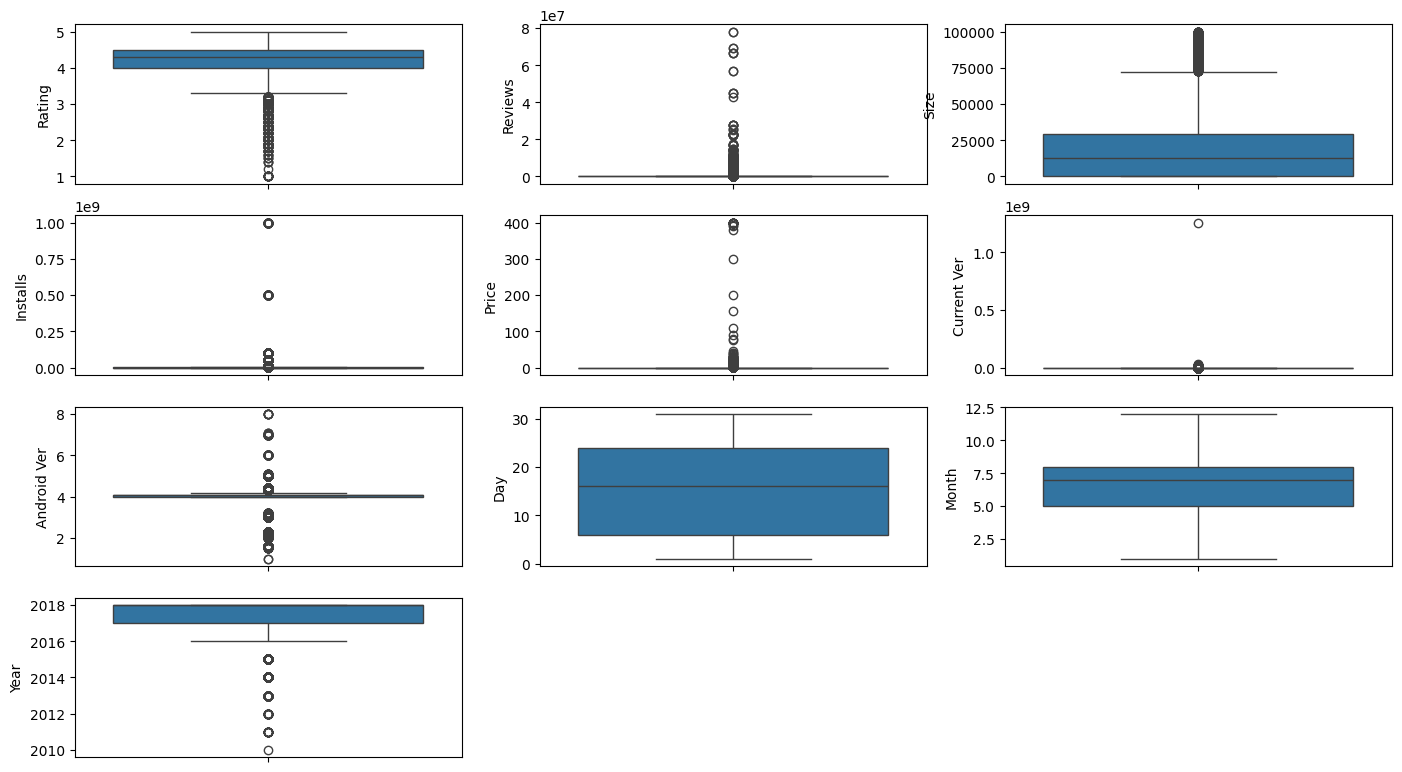

In [49]:
#checking for outliers
i = 0
plt.figure(figsize=(17,12))
for col in num_features:
    plt.subplot(5,3,i+1)
    sns.boxplot(y = df[col])
    i = i + 1

The best way to fill is median for numerical features

In [50]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size              1526
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Current Ver       1520
Android Ver       1223
Day                  0
Month                0
Year                 0
dtype: int64

In [51]:
# use simple imputer to easy fill
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="median")
df[num_features] = num_imputer.fit_transform(df[num_features])

cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_features] = cat_imputer.fit_transform(df[cat_features])

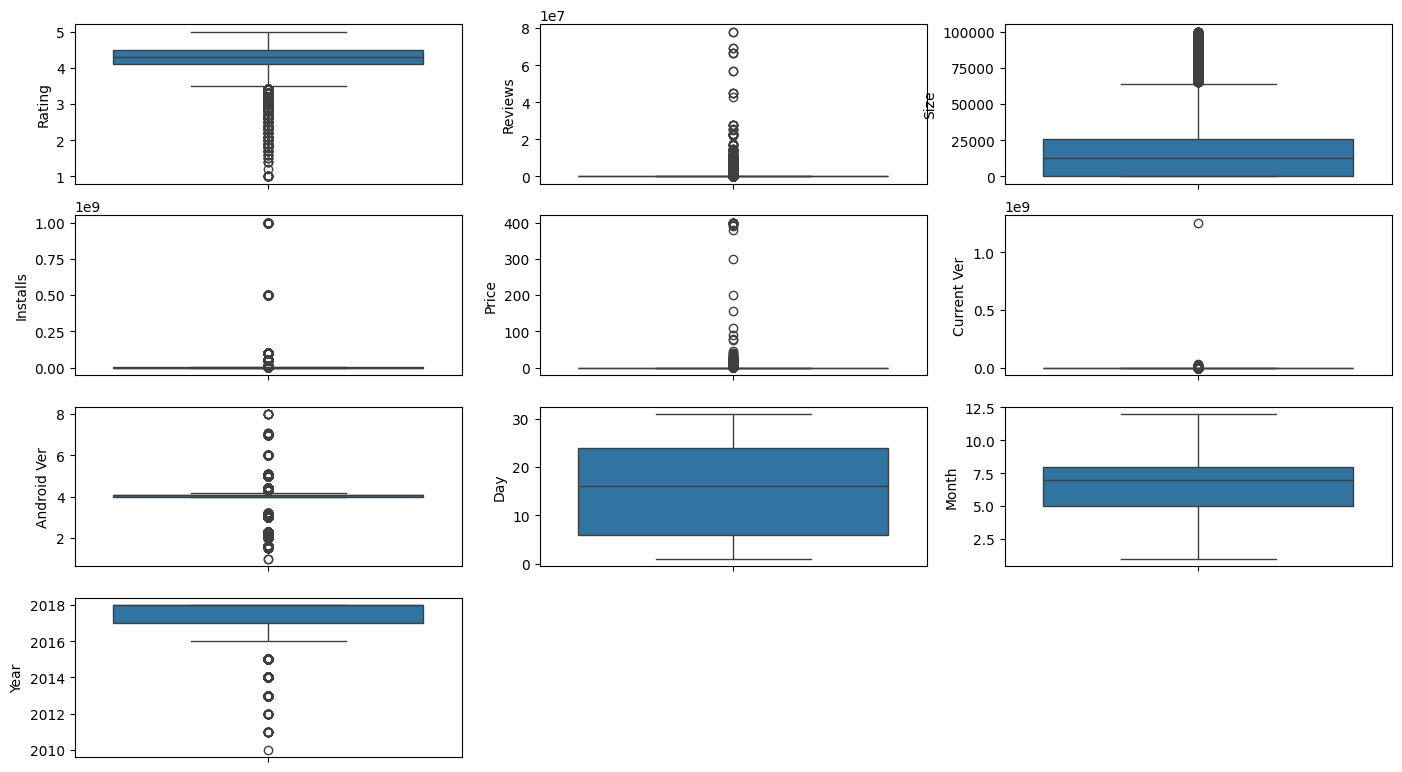

In [52]:
i = 0
plt.figure(figsize=(17,12))
for col in num_features:
    plt.subplot(5,3,i+1)
    sns.boxplot(y = df[col])
    i = i + 1

In [53]:
df.describe()

,Rating,Reviews,Size,Installs,Price,Current Ver,Android Ver,Day,Month,Year
count,10357.000000,1.035700e+04,10357.000000,1.035700e+04,10357.000000,1.035700e+04,10357.000000,10357.000000,10357.000000,10357.000000
mean,4.203737,4.059046e+05,18390.628039,1.415776e+07,1.030800,1.460406e+05,3.882534,15.619098,6.397026,2017.382929
std,0.485594,2.696778e+06,22272.320912,8.023955e+07,16.278625,1.235299e+07,0.795447,9.528658,2.606359,1.112766
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,1.000000,1.000000,1.000000,2010.000000
25%,4.100000,3.200000e+01,6.600000,1.000000e+03,0.000000,1.131000e+00,4.000000,6.000000,5.000000,2017.000000
50%,4.300000,1.680000e+03,13000.000000,1.000000e+05,0.000000,1.900000e+00,4.100000,16.000000,7.000000,2018.000000
75%,4.500000,4.641600e+04,26000.000000,1.000000e+06,0.000000,3.100000e+00,4.100000,24.000000,8.000000,2018.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000,1.255162e+09,8.000000,31.000000,12.000000,2018.000000


# Exploratory Data Analysis (EDA)

### 1- What is the most expensive app on the Play Store?
    

In [54]:
df.sort_values("Price",ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
3913,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,10000.0,Paid,400.00,Everyone,Lifestyle,1.0,4.1,3.0,5.0,2018.0
4902,I am Rich!,FINANCE,3.8,93.0,22000.0,1000.0,Paid,399.99,Everyone,Finance,1.0,4.1,11.0,12.0,2017.0
4898,I am Rich Plus,FAMILY,4.0,856.0,8.7,10000.0,Paid,399.99,Everyone,Entertainment,3.0,4.4,19.0,5.0,2018.0
3908,💎 I'm rich,LIFESTYLE,3.8,718.0,26000.0,10000.0,Paid,399.99,Everyone,Lifestyle,1.0,4.4,11.0,3.0,2018.0
9453,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.3,0.0,40000.0,0.0,Paid,399.99,Everyone,Lifestyle,1.9,4.1,1.0,12.0,2017.0


In [55]:
import plotly.express as px
px.scatter(x=df["Price"],y=df["App"])

##### coclusion : I'm Rich - Trump Edition is the most expensive app 

### 2- Which genre has the highest number of apps?

In [56]:
df["Genres"].value_counts()

Genres
Tools                       842
Entertainment               588
Education                   527
Business                    427
Medical                     408
                           ... 
Role Playing;Brain Games      1
Strategy;Education            1
Racing;Pretend Play           1
Communication;Creativity      1
Strategy;Creativity           1
Name: count, Length: 119, dtype: int64

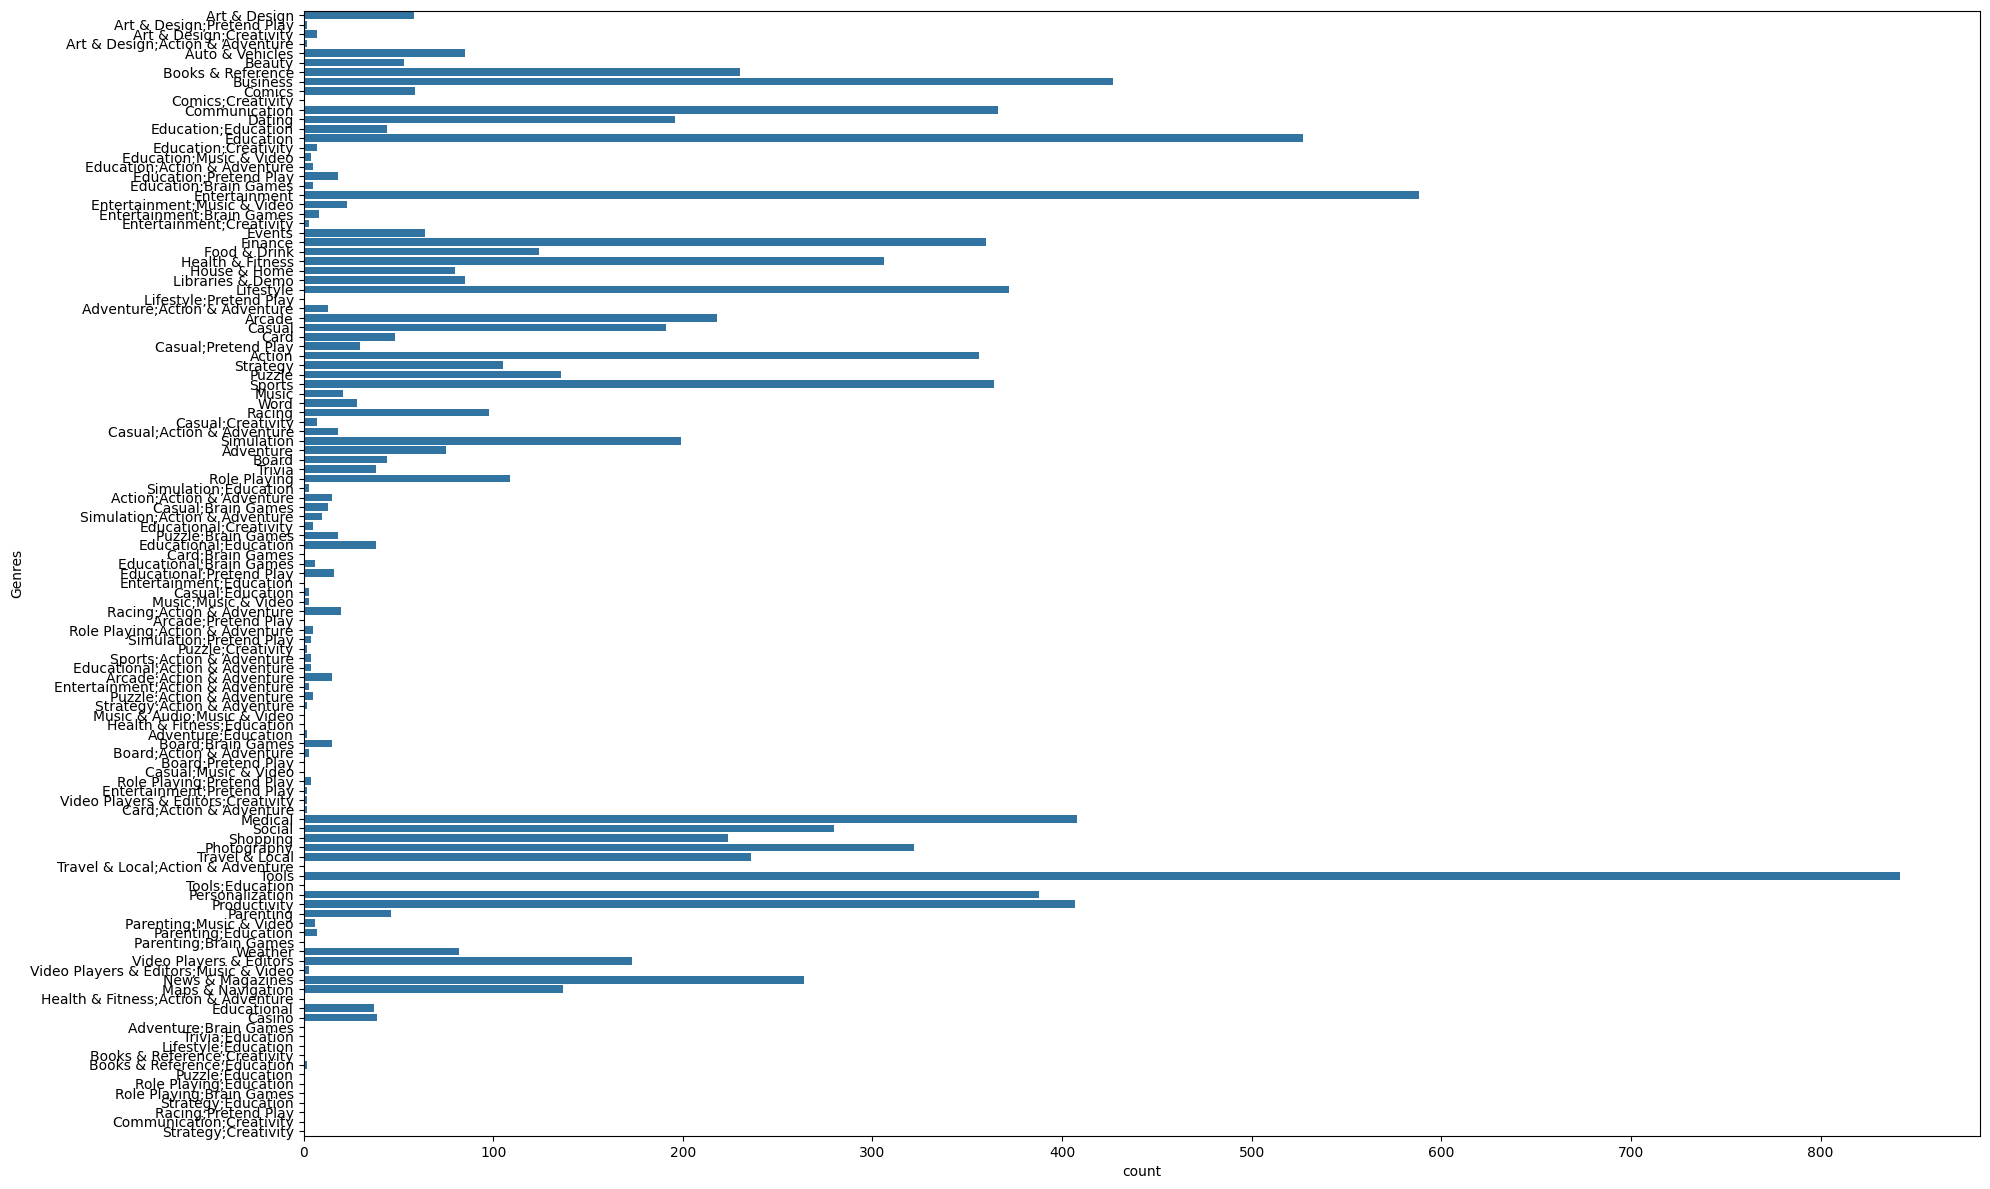

In [57]:
plt.figure(figsize=(20,12))
sns.countplot(y="Genres",data=df)
plt.tight_layout()

#### The most genre app is tools

#### 3- What is the average size of free vs. paid apps?

In [58]:
x=df["Type"].value_counts(normalize=True)

In [59]:
px.pie(values=x.values, names=x.index, title="Distribution of Types", hole=0.3)

### 4- What are the top 5 most expensive apps with a perfect rating (5)?

In [60]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Day', 'Month', 'Year'],
      dtype='object')

In [61]:
df_with_rating_5=df[df["Rating"] == 5]
df_with_rating_5.sort_values(by="Price",ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
5033,AP Art History Flashcards,FAMILY,5.0,1.0,96000.0,10.0,Paid,29.99,Mature 17+,Education,3.30,4.0,19.0,1.0,2016.0
7008,USMLE Step 2 CK Flashcards,FAMILY,5.0,1.0,40000.0,10.0,Paid,19.99,Everyone,Education,2.47,2.2,26.0,5.0,2014.0
5026,meStudying: AP English Lit,FAMILY,5.0,1.0,655.0,10.0,Paid,4.99,Everyone,Education,1.30,2.0,31.0,8.0,2013.0
6735,TI-84 CE Graphing Calculator Manual TI 84,FAMILY,5.0,1.0,27000.0,100.0,Paid,4.99,Everyone,Education,1.50,4.1,28.0,3.0,2018.0
4790,Hey AJ! It's Bedtime!,FAMILY,5.0,1.0,63000.0,10.0,Paid,4.99,Everyone,Education,1.00,2.3,4.0,4.0,2018.0


In [62]:

px.scatter(x=df_with_rating_5["Price"],y=df_with_rating_5["App"])

### Conclusion : The most 5 expensive book with rating 5 is <br>  
    - AP Art History Flashcards  
    - USMLE Step 2 CK Flashcards 
    - meStudying: AP English Lit  
    - Hey AJ! It's Bedtime!
    - TI-84 CE Graphing Calculator Manual TI 84
    

### 5- How many apps have received more than 50K reviews?

In [63]:
df["Reviews"].unique()

array([   159.,    967.,  87510., ...,    603.,   1195., 398307.])

In [64]:
df_50k = df[df["Reviews"]>50000]
df_50k.shape[0]

2525

##### Conclusion: 1571 is the apps that have more than 50k Reviews


### 6- What is the average price of apps, grouped by genre and number of installs?

In [65]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Day', 'Month', 'Year'],
      dtype='object')

In [66]:
avg_price = df.groupby(["Genres", "Installs"])["Price"].mean().reset_index()
avg_price = avg_price.sort_values(by="Price", ascending=False)
avg_price

,Genres,Installs,Price
503,Lifestyle,0.0,399.99
426,Finance,0.0,212.99
538,Medical,0.0,200.00
638,Productivity,0.0,154.99
414,Events,1.0,109.99
...,...,...,...
19,Action;Action & Adventure,5000000.0,0.00
18,Action;Action & Adventure,1000000.0,0.00
879,Trivia;Education,100.0,0.00
878,Trivia,100000000.0,0.00


### 7- How many apps have a rating higher than 4.7, and what is their average price?

In [67]:
x = df[df["Rating"]>4.7].groupby("Rating")["Price"].mean()
x

Rating
4.8    0.638860
4.9    0.217701
5.0    0.376494
Name: Price, dtype: float64

In [68]:
px.pie(values=x,names=["4.8","4.9","5.0"],title="distribution of the Rating",hole=0.3).update_traces(textinfo="percent+label")


8.	What is Google's estimated revenue from apps with 5,000,000+ installs?
(Assuming Google takes a 30% cut from app sales)


In [69]:
hight_intalls_apps = df[df["Installs"]>5000000]
revenue = (hight_intalls_apps["Installs"] * hight_intalls_apps["Price"]*.3).sum()
revenue

np.float64(44910000.0)

#### Conclusion: Total revenue for apps that have more than 5000000 is 2970000.0

### 9- What are the maximum and minimum sizes of free vs. paid apps?

In [70]:
df["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [71]:
max_values = df.groupby("Type")["Size"].max()
min_values = df.groupby("Type")["Size"].min()

In [72]:
min_values

Type
Free    1.0
Paid    1.0
Name: Size, dtype: float64

In [73]:
max_values

Type
Free    100000.0
Paid    100000.0
Name: Size, dtype: float64

In [74]:
px.scatter(x=df["Type"],y=df["Size"])

<h4> Conclusion  <br>
The max Values for paid and free apps is 100000k <br>
The min Values for paid and free apps is 1k </h4> 

###	10- Is there a correlation between an app’s rating, number of reviews, size, and its price?

In [75]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Day', 'Month', 'Year'],
      dtype='object')

<Axes: >

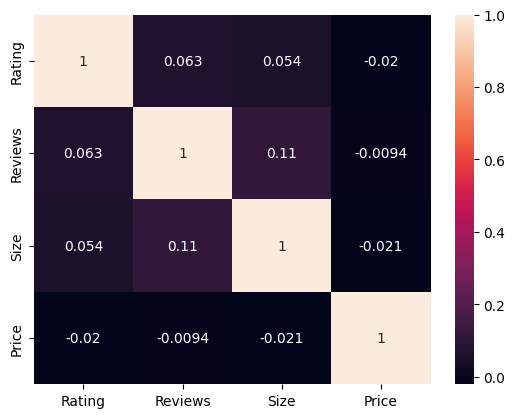

In [76]:
sns.heatmap(df[["Rating","Reviews","Size","Price"]].corr(),annot=True)

#### Conclusion : The Relation is very weak between them

### 11- How many apps exist for each type (free/paid) across different content ratings?

In [77]:
df.groupby(df["Rating"])["Type"].count()

Rating
1.0      16
1.2       1
1.4       3
1.5       3
1.6       4
1.7       8
1.8       8
1.9      12
2.0      12
2.1       8
2.2      14
2.3      20
2.4      19
2.5      20
2.6      24
2.7      23
2.8      40
2.9      45
3.0      82
3.1      69
3.2      64
3.3     101
3.4     127
3.5     157
3.6     169
3.7     231
3.8     293
3.9     372
4.0     539
4.1     657
4.2     888
4.3    2481
4.4    1032
4.5     977
4.6     768
4.7     484
4.8     228
4.9      87
5.0     271
Name: Type, dtype: int64

#### 12- How many apps are compatible with Android version 4.x?

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  float64
 4   Size            10357 non-null  float64
 5   Installs        10357 non-null  float64
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Current Ver     10357 non-null  float64
 11  Android Ver     10357 non-null  float64
 12  Day             10357 non-null  float64
 13  Month           10357 non-null  float64
 14  Year            10357 non-null  float64
dtypes: float64(10), object(5)
memory usage: 1.2+ MB


In [79]:
df_fake = df[(df["Android Ver"]>=4) & (df["Android Ver"]< 5)]
df_fake["Android Ver"].count()

np.int64(7920)

#### Conclusion : The number of Apps is compatible with android 4.x is  5191